# Your info

Full name: Ghazal ZamaniNejad

Student ID: 97522166

Notice: **You can add new cells for each part.**

# Q1.A. Kohonen

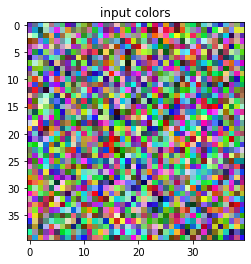

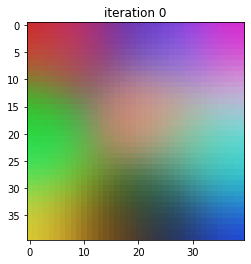

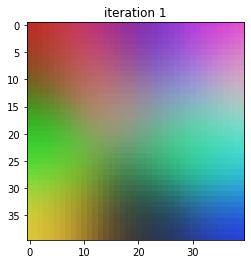

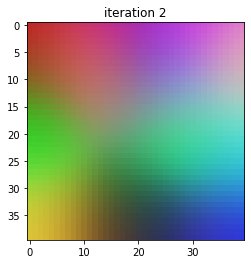

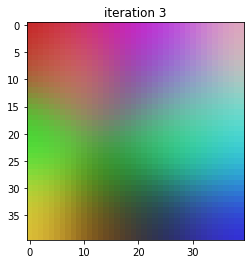

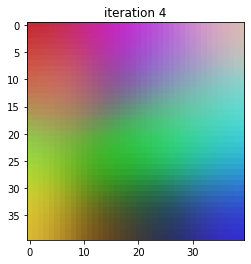

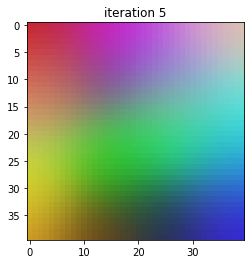

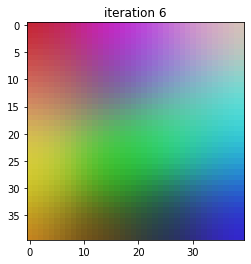

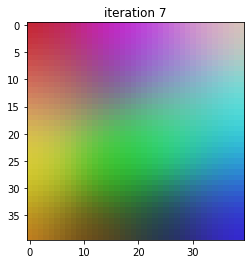

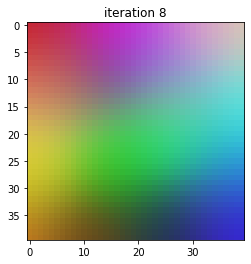

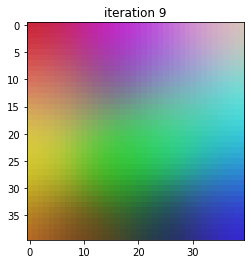

In [19]:
#write your code here

import numpy as np
# import matplotlib.pyplot as plt
import pylab as plt

class Kohonen:
  def __init__(self, input_neurons, map_dim, inputs, learning_rate, r, epoch):
    #neurons count
    self.input_neurons = input_neurons
    self.map_dim = map_dim
    self.learning_rate = learning_rate
    self.neighbor_radius = r 
    self.epoch = epoch
    #normalize the data
    self.inputs = np.divide(inputs, 255) 

    #initialize weights 
    self.weights = np.random.rand(self.map_dim[0], self.map_dim[1], 3)

#####################################################################################

  def competition(self, data):
    repeated_arr = np.tile(data, (self.map_dim[0], self.map_dim[1], 1))
    sub = np.subtract(repeated_arr, self.weights)
    pow = np.power(sub, 2)
    sigma = np.sum(pow, axis=2)
    root = np.sqrt(sigma)
    index = np.unravel_index(np.argmin(root, axis=None), root.shape)
    return index
#####################################################################################
    
  #gausian function
  def cooperate(self, distances):
    return np.exp(((-distances) / (2 * self.neighbor_radius**2)))
#####################################################################################

  def changes(self, data, index):
    h = self.cooperate(self.distToWinner(index))
    h = np.reshape(h, (h.shape[0], h.shape[1], 1))
    h = np.repeat(h, 3, axis=2)
    repeated = np.tile(data, (self.map_dim[0], self.map_dim[1], 1))
    change = np.multiply(self.learning_rate , np.multiply(np.subtract(repeated, self.weights), h))
    self.weights += change
    
#####################################################################################
  def indices_array(self, m,n):
    r0 = np.arange(m) 
    r1 = np.arange(n)
    out = np.empty((m,n,2),dtype=int)
    out[:,:,0] = r0[:,None]
    out[:,:,1] = r1
    return out

  def distToWinner(self, index):
    winner_index = np.tile(np.array([[index[0], index[1]]]), (self.map_dim[0], self.map_dim[1], 1))
    indexes = self.indices_array(self.map_dim[0], self.map_dim[1])
    sub = np.subtract(winner_index, indexes)
    pow = np.power(sub, 2)
    sum = np.sum(pow, axis=2)
    return sum
#####################################################################################

  def learn(self):
    for e in range(self.epoch):
      for d in self.inputs:
        i = self.competition(d)
        self.changes(d, i)
      title = "iteration " + str(e)
      plt.title(title)
      plt.imshow(self.weights)
      plt.show()

s = 40
epoch = 10
#array of rgb colors
rgb = np.random.randint(255, size=(s**2, 3))
plt.imshow(rgb.reshape(s, s, 3))
plt.title("input colors")
plt.show()

k_map = Kohonen(s**2, (s, s), rgb, 0.1, 5, epoch)
k_map.learn()


# Q1.B. Kohonen

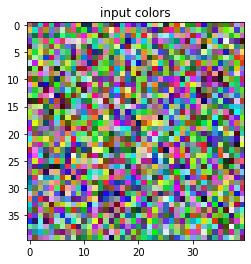

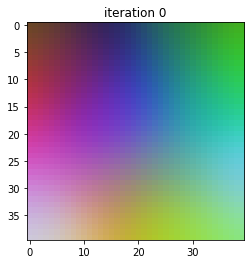

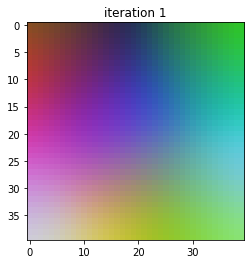

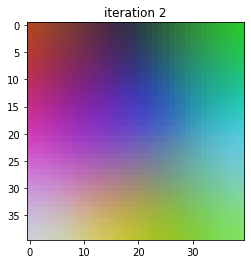

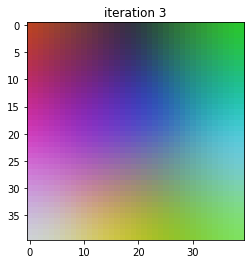

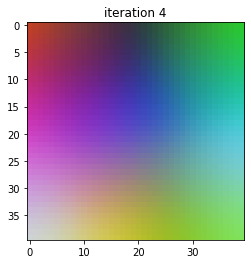

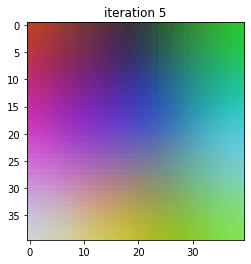

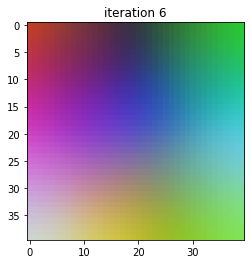

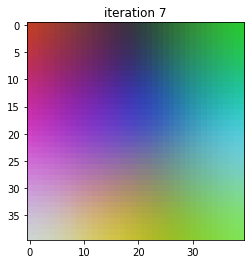

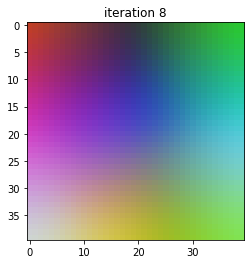

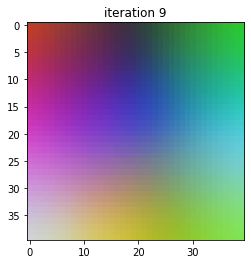

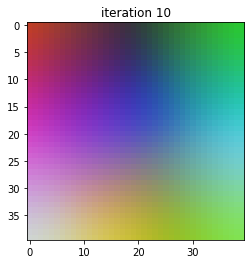

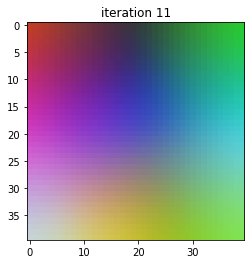

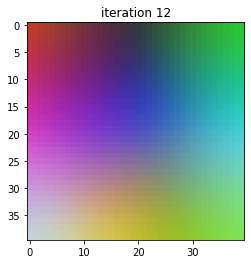

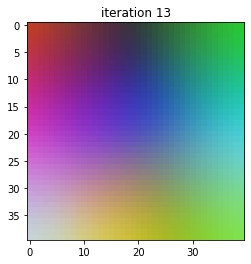

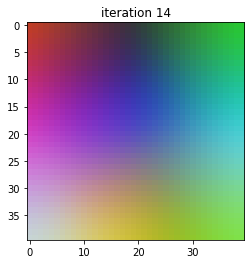

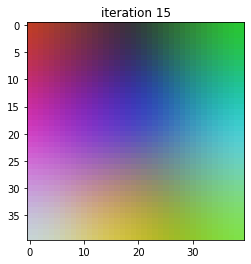

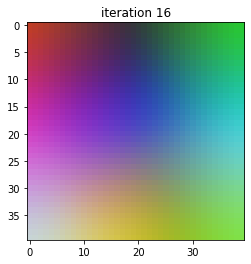

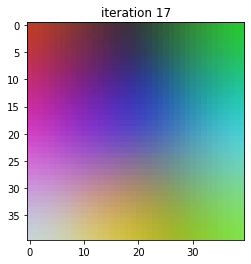

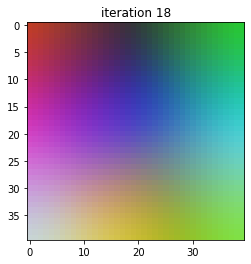

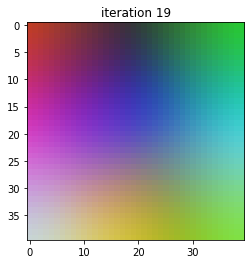

In [20]:
#write your code here

import numpy as np
# import matplotlib.pyplot as plt
import pylab as plt

class Kohonen:
  def __init__(self, input_neurons, map_dim, inputs, learning_rate, r, epoch):
    #neurons count
    self.input_neurons = input_neurons
    self.map_dim = map_dim
    self.learning_rate = learning_rate
    self.neighbor_radius = r 
    self.epoch = epoch
    #normalize the data
    self.inputs = np.divide(inputs, 255) 

    #initialize weights 
    self.weights = np.random.rand(self.map_dim[0], self.map_dim[1], 3)

#####################################################################################

  def decrease_lr(self, i):
      return self.learning_rate * np.exp(-i / self.epoch)

#####################################################################################

  def competition(self, data):
    repeated_arr = np.tile(data, (self.map_dim[0], self.map_dim[1], 1))
    sub = np.subtract(repeated_arr, self.weights)
    pow = np.power(sub, 2)
    sigma = np.sum(pow, axis=2)
    root = np.sqrt(sigma)
    index = np.unravel_index(np.argmin(root, axis=None), root.shape)
    return index
#####################################################################################
    
  #gausian function
  def cooperate(self, distances):
    return np.exp(((-distances) / (2 * self.neighbor_radius**2)))
#####################################################################################

  def changes(self, data, index, lr):
    h = self.cooperate(self.distToWinner(index))
    h = np.reshape(h, (h.shape[0], h.shape[1], 1))
    h = np.repeat(h, 3, axis=2)
    repeated = np.tile(data, (self.map_dim[0], self.map_dim[1], 1))
    change = np.multiply(lr , np.multiply(np.subtract(repeated, self.weights), h))
    self.weights += change
    
#####################################################################################
  def indices_array(self, m,n):
    r0 = np.arange(m) 
    r1 = np.arange(n)
    out = np.empty((m,n,2),dtype=int)
    out[:,:,0] = r0[:,None]
    out[:,:,1] = r1
    return out

  def distToWinner(self, index):
    winner_index = np.tile(np.array([[index[0], index[1]]]), (self.map_dim[0], self.map_dim[1], 1))
    indexes = self.indices_array(self.map_dim[0], self.map_dim[1])
    sub = np.subtract(winner_index, indexes)
    pow = np.power(sub, 2)
    sum = np.sum(pow, axis=2)
    return sum
#####################################################################################

  def learn(self):
    for e in range(self.epoch):
      lr = self.decrease_lr(e)
      for d in self.inputs:
        i = self.competition(d)
        self.changes(d, i, lr)
      title = "iteration " + str(e)
      plt.title(title)
      plt.imshow(self.weights)
      plt.show()

s = 40
epoch = 20
#array of rgb colors
rgb = np.random.randint(255, size=(s**2, 3))
plt.imshow(rgb.reshape(s, s, 3))
plt.title("input colors")
plt.show()

k_map = Kohonen(s**2, (s, s), rgb, 0.1, 5, epoch)
k_map.learn()


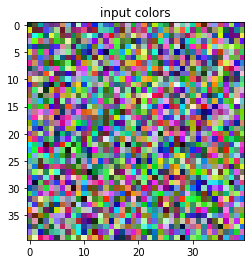

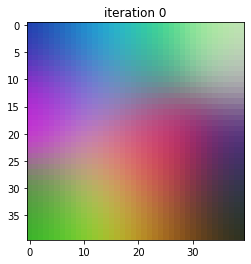

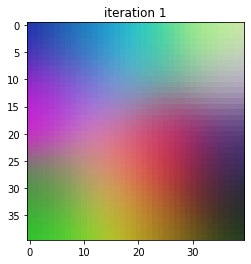

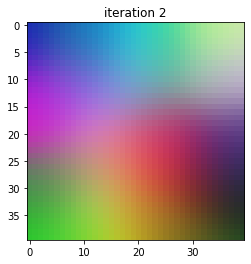

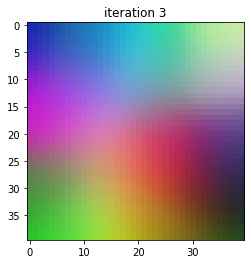

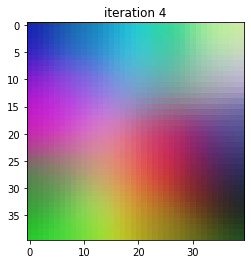

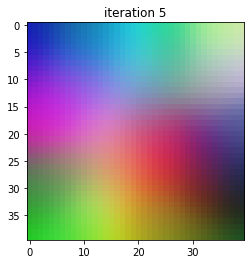

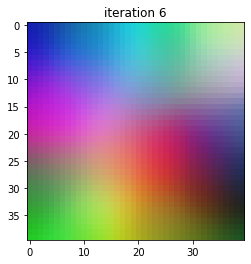

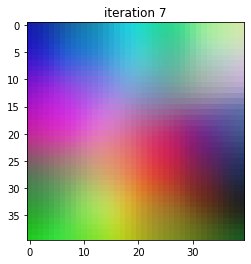

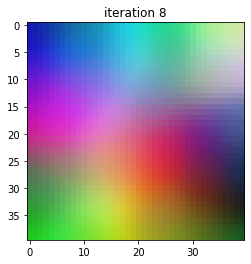

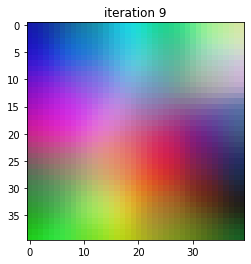

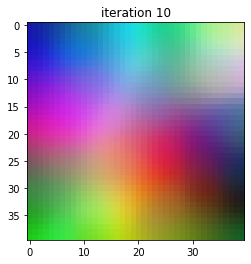

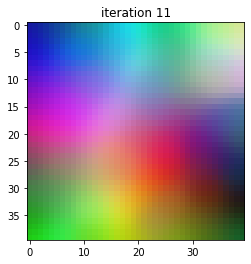

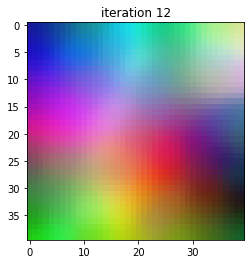

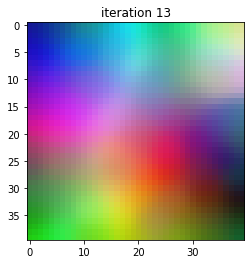

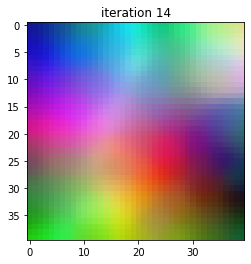

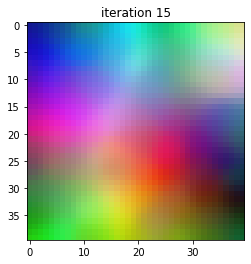

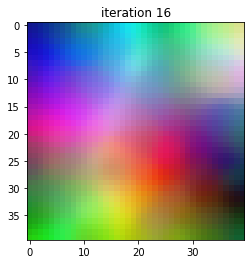

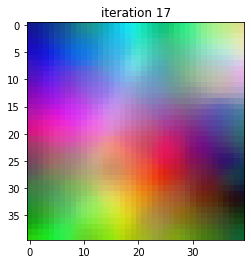

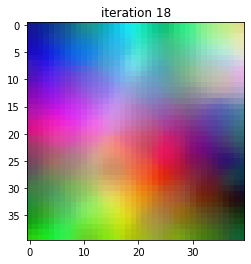

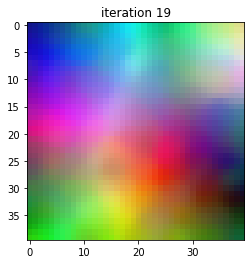

In [21]:
#write your code here

import numpy as np
# import matplotlib.pyplot as plt
import pylab as plt

class Kohonen:
  def __init__(self, input_neurons, map_dim, inputs, learning_rate, r, epoch):
    #neurons count
    self.input_neurons = input_neurons
    self.map_dim = map_dim
    self.learning_rate = learning_rate
    self.neighbor_radius = r 
    self.epoch = epoch
    #normalize the data
    self.inputs = np.divide(inputs, 255) 

    #initialize weights 
    self.weights = np.random.rand(self.map_dim[0], self.map_dim[1], 3)

    self.timeconst = self.epoch / np.log(self.neighbor_radius)

#####################################################################################
  def decrease_radius(self, i):
      return self.neighbor_radius * np.exp(-i / self.timeconst)

#####################################################################################

  def competition(self, data):
    repeated_arr = np.tile(data, (self.map_dim[0], self.map_dim[1], 1))
    sub = np.subtract(repeated_arr, self.weights)
    pow = np.power(sub, 2)
    sigma = np.sum(pow, axis=2)
    root = np.sqrt(sigma)
    index = np.unravel_index(np.argmin(root, axis=None), root.shape)
    return index
#####################################################################################
    
  #gausian function
  def cooperate(self, distances, r):
    return np.exp(((-distances) / (2 * r**2)))
#####################################################################################

  def changes(self, data, index, r):
    h = self.cooperate(self.distToWinner(index), r)
    h = np.reshape(h, (h.shape[0], h.shape[1], 1))
    h = np.repeat(h, 3, axis=2)
    repeated = np.tile(data, (self.map_dim[0], self.map_dim[1], 1))
    change = np.multiply(self.learning_rate , np.multiply(np.subtract(repeated, self.weights), h))
    self.weights += change
    
#####################################################################################
  def indices_array(self, m,n):
    r0 = np.arange(m) 
    r1 = np.arange(n)
    out = np.empty((m,n,2),dtype=int)
    out[:,:,0] = r0[:,None]
    out[:,:,1] = r1
    return out

  def distToWinner(self, index):
    winner_index = np.tile(np.array([[index[0], index[1]]]), (self.map_dim[0], self.map_dim[1], 1))
    indexes = self.indices_array(self.map_dim[0], self.map_dim[1])
    sub = np.subtract(winner_index, indexes)
    pow = np.power(sub, 2)
    sum = np.sum(pow, axis=2)
    return sum
#####################################################################################

  def learn(self):
    for e in range(self.epoch):
      r = self.decrease_radius(e)
      for d in self.inputs:
        i = self.competition(d)
        self.changes(d, i, r)
      title = "iteration " + str(e)
      plt.title(title)
      plt.imshow(self.weights)
      plt.show()

s = 40
epoch = 20
#array of rgb colors
rgb = np.random.randint(255, size=(s**2, 3))
plt.imshow(rgb.reshape(s, s, 3))
plt.title("input colors")
plt.show()

k_map = Kohonen(s**2, (s, s), rgb, 0.1, 5, epoch)
k_map.learn()


# Q2.A. MLP

Epoch 1/500
63/63 [==============================] - 0s 999us/step - loss: 0.8424
Epoch 2/500
63/63 [==============================] - 0s 993us/step - loss: 0.4375
Epoch 3/500
63/63 [==============================] - 0s 1ms/step - loss: 0.4045
Epoch 4/500
63/63 [==============================] - 0s 959us/step - loss: 0.3675
Epoch 5/500
63/63 [==============================] - 0s 1ms/step - loss: 0.3101
Epoch 6/500
63/63 [==============================] - 0s 1ms/step - loss: 0.2676
Epoch 7/500
63/63 [==============================] - 0s 1ms/step - loss: 0.2408
Epoch 8/500
63/63 [==============================] - 0s 1ms/step - loss: 0.2101
Epoch 9/500
63/63 [==============================] - 0s 1ms/step - loss: 0.2120
Epoch 10/500
63/63 [==============================] - 0s 1ms/step - loss: 0.1974
Epoch 11/500
63/63 [==============================] - 0s 1ms/step - loss: 0.1844
Epoch 12/500
63/63 [==============================] - 0s 1ms/step - loss: 0.1833
Epoch 13/500
63/63 [===========

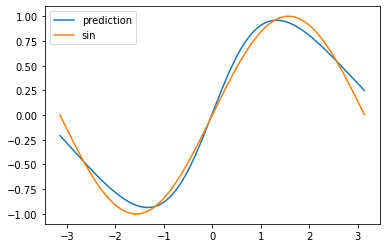

In [22]:
#write your code here
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt

#define sine function
x = np.arange(-100 * np.pi, 100 * np.pi).reshape(-1,1) / 100
y = np.sin(x)

#initialize mlp
model = Sequential()
model.add(Dense(50, activation='sigmoid', input_shape=(1, )))
model.add(Dense(30, activation='sigmoid') )
model.add(Dense(1))                                  

#train the mlp
nb_epoch = 500
batch = 10
model.compile(loss='mean_squared_error', optimizer='SGD')
history = model.fit(x, y, epochs=nb_epoch, batch_size=batch)

#test
predictions = model.predict(x)
plt.plot(x, predictions)
plt.plot(x, np.sin(x))
plt.legend(['prediction', 'sin'])
plt.show()


# Q2.B. RBF

Streaming output truncated to the last 5000 lines.
train error  0.0004343445151657111
train error  0.009975360605534032
train error  0.02359041916410507
train error  0.0001649946392862737
train error  0.002969575163900919
train error  0.04160035068529346
train error  0.05505371632348049
train error  0.07628473105274036
train error  0.0018933290992178063
train error  0.0001570563853615444
train error  0.03969561605998558
train error  0.21670290922915925
train error  0.10761972792933802
train error  0.013510894325019373
train error  0.13350409223052093
train error  0.05059616955930149
train error  0.1181907820839585
train error  0.0024721745443799055
train error  0.049369574551755585
train error  0.1542629432143183
train error  3.1751107273575014e-05
train error  0.2664946410637732
train error  2.2756715784039754e-05
train error  0.31591598960982015
train error  0.15856725061616667
train error  0.32637297444973196
train error  0.007014393876911097
train error  0.12509664314969696
train e

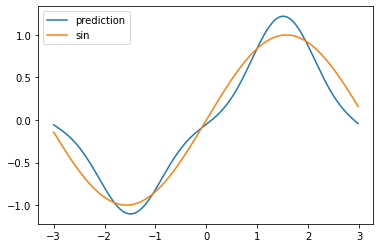

In [23]:
#write your code here
import numpy as np
import matplotlib.pyplot as plt

class RBF:
  def __init__ (self, k, learning_rate, epochs):
    self.kernel = k
    self.learning_rate = learning_rate
    self.epochs = epochs
    # self.usestd = usestd

    # random from “standard normal” distribution
    self.weights = np.random.randn(k)
    self.b = np.random.randn(1)
    self.centers = []
    self.radius = []
#####################################################################

  def train(self, data, desired):
    #find centers and radius by k-mean clustering
    self.centers, self.radius = self.k_cluster(data)
    for i in range(self.epochs):
      for j in range(data.shape[0]):
        #join centers and radius
        radials = np.array((self.centers, self.radius)).T
        #forward pass
        rbf = np.array([self.gaussian_rbf(data[j], center, r) for center, r in radials])
        sigma = rbf.T.dot(self.weights) + self.b

        #back propagate
        e = (desired[j] - sigma)
        Error = e **2
        print("train error ", Error[0])

        #update
        self.weights += self.learning_rate * rbf * e
        self.b += self.learning_rate * e

#####################################################################

  def gaussian_rbf(self, x, t, sigma):
    return np.exp(-1 * (x-t)**2 / (sigma**2))
#####################################################################

  def k_cluster(self, x):
    #randomly initialize centroids
    centroids = np.random.choice(np.squeeze(x), size=self.kernel, replace=False)

    convergence = False
    x = x.reshape((x.shape[0], 1))
    repeated_arr = np.repeat(x, self.kernel, axis=1)

    while not convergence:
      c = np.tile(centroids, (x.shape[0], 1))
      dist = np.abs(np.subtract(repeated_arr, c))
      index = np.argmin(dist, axis=1) #showing each point belongs to which cluster
      
      new_centroids = np.copy(centroids)
      for i in range(self.kernel):
        clusterpoints = x[index==i]
        if len(clusterpoints) != 0:
          new_centroids[i] = np.average(clusterpoints)
          
      #check for convergence
      max_change = np.amax(np.abs(np.subtract(new_centroids, centroids)))
      if max_change < 1e-6:
        convergence = True
      centroids = new_centroids

    #check the clusters
    c = np.tile(centroids, (x.shape[0], 1))
    dist = np.abs(np.subtract(repeated_arr, c))
    index = np.argmin(dist, axis=1)

    smallclusters = []
    standard_deviations = np.zeros(self.kernel)
    for i in range(self.kernel):
      clusterpoints = x[index==i]
      if len(clusterpoints) < 2:
        smallclusters.append(i) #clusters that have less than 2 points
        continue
      standard_deviations[i] = np.std(clusterpoints)

    # for clusters with less than 2 points, take the mean std of the other clusters
    if len(smallclusters) != 0:
      otherpoints = []
      for i in range(self.kernel):
        if i in smallclusters: continue
        otherpoints.append(x[index==i])
        otherpoints = np.reshape(1, -1)
      
      standard_deviations[smallclusters] = np.average(np.std(otherpoints))
    print("centroids: ", centroids)
    print("radiuses: ", standard_deviations)
    return (centroids, standard_deviations)

#####################################################################
  
  def predict(self, testdata):
    predictions = []
    for t in testdata:
      radials = np.array((self.centers, self.radius)).T
      rbf = np.array([self.gaussian_rbf(t, center, r) for center, r in radials])
      sigma = rbf.T.dot(self.weights) + self.b
      predictions.append(sigma)
    return np.array(predictions)

#train data
x_train = np.arange(-300, 300) / 50
noise = np.random.uniform(-0.3, 0.3, x_train.size)
y = np.sin(x_train) + noise
rbf = RBF(4, 0.01, 300)
rbf.train(x_train, y)

#test data
x_test = np.arange(-150, 150) / 50
predictions = rbf.predict(x_test)

plt.plot(x_test, predictions)
plt.plot(x_test, np.sin(x_test))
plt.legend(['prediction', 'sin'])
plt.show()


# Q2.C. Compare

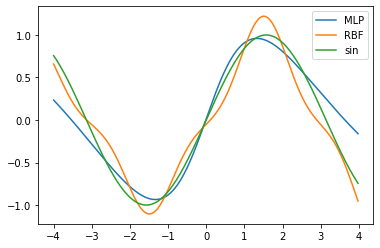

In [24]:
#test data using rbf
x_test = np.arange(-200, 200) / 50
rbf_predictions = rbf.predict(x_test)


#test data using mlp
mlp_predictions = model.predict(x_test)


plt.plot(x_test, mlp_predictions)
plt.plot(x_test, rbf_predictions)
plt.plot(x_test, np.sin(x_test))
plt.legend(['MLP', 'RBF', 'sin'])
plt.show()



# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
   

  according to the question number.
  - There are 2 assignments in Gradescope: 

    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI992_HW2.ipynb`
    - `Q1.A. Kohonen.py`
    - `Q1.B. Koohonen.py`
    - `Q2.A. MLP.py`
    - `Q2.B. RBF.py`
    - `Q2.C. Compare.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.